In [51]:
import torch
from PIL import Image
import torchvision.transforms as T
from transformers import AutoProcessor, FlavaModel
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import gc

In [52]:
model = FlavaModel.from_pretrained('facebook/flava-full')
processor = AutoProcessor.from_pretrained("facebook/flava-full")

In [53]:
def process_pair(image_path, context):
    
    img = Image.open(image_path)
    inputs = processor(text=[context], images=img, return_tensors="pt", padding=True)
    return inputs



In [54]:
def run_flava_inference(image_path, context, labels):
    
    inputs = process_pair(image_path, context)

    with torch.no_grad():
        # Forward pass through FLAVA model
        outputs = model(**inputs)
        logits_per_image = outputs.text_image_logits  # This tensor correlates the text and image inputs

    # Determine the best label
    best_label_idx = logits_per_image.argmax().item()  # Get index of the best label
    return labels[best_label_idx]


In [55]:
labels = ["Login Button", "Input Box", "Accept Button", "Video", "Logo"]
doi = "/home/pyt_user/pp/pytorch/flava/test_img_text"

In [56]:
img_fn_list = sorted([fn for fn in os.listdir(doi) if fn.endswith('.png')])
txt_fn_list = sorted([fn for fn in os.listdir(doi) if fn.endswith('.txt')])

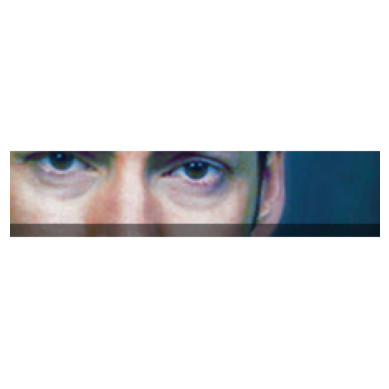

/home/pyt_user/miniconda3/envs/pyt_venv/lib/python3.11/site-packages/transformers/modeling_utils.py:1051: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


AttributeError: 'FlavaModelOutput' object has no attribute 'text_image_logits'

In [57]:
for i in range(len(img_fn_list)):
    
    image_path = os.path.join(doi, img_fn_list[i])
    txt_path = os.path.join(doi, txt_fn_list[i])
    
    context = ""
        
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')  # Turn off axis numbers
    plt.show()
    print(context)

    # Run inference
    best_label = run_flava_inference(image_path, context, labels)
    # print(f"Context: {context}")
    print(f"Label: {best_label}")
    
    print()
    print("##################################################")
    print()